# Streams, Playlists, and Popularity: Understanding Success on Spotify
### Chaaya Girimon GH1027231

### Business and Data Context:


#### Business Context:

According to IFPI's Global Music Report (2022), streaming platforms like Spotify have transformed the music industry, now representing the primary mode of music consumption globally [1]. With over 500 million active users, platforms like Spotify use algorithms and curated playlists to influence what songs are promoted and listened to [9].

In this new digital landscape, the success of an artist is often measured by the number of **streams** their songs accumulate. For record labels, producers, and artists, understanding the key factors that drive streams is critical to designing effective strategies for song production, marketing, and distribution. This includes identifying which **audio features** make a song more likely to go viral, what **playlisting strategies** are most effective, and the role of **release timing** in maximizing streams.

This analysis is aimed at stakeholders in the music industry, including:
- **Artists and Producers**: To help optimize song features and release timing for maximum audience engagement.
- **Record Labels**: To design marketing strategies that increase an artist’s visibility on streaming platforms.
- **Streaming Platforms**: To refine playlisting and recommendation algorithms to increase user satisfaction and engagement.

The goal of this analysis is to extract meaningful insights from a dataset of Spotify’s most-streamed songs, focusing on the factors that contribute to a song’s success. By understanding the relationship between audio features, playlist inclusion, and streams, this analysis provides actionable guidance for optimizing music production and marketing strategies.

#### Audience:
- **Artists**: Looking to increase their streaming numbers and gain exposure through playlists.
- **Record Labels**: Interested in building effective release schedules, playlist promotion strategies, and identifying emerging trends in music preferences.
- **Streaming Platforms**: Aiming to enhance user engagement through better curation of playlists and recommendations based on listener behavior and preferences.

#### Data Context:

The dataset: https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs/data

Spotify provides various audio features for each song, including **danceability**, which measures how suitable a track is for dancing, and **energy**, which represents the intensity of the track [3]. These features, alongside playlist inclusion, are crucial in determining a song's success on streaming platforms [4].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

In [2]:
df = pd.read_csv("Spotify Most Streamed Songs.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


#### Data exploration

The dataset used in this analysis includes detailed attributes related to Spotify’s **most-streamed songs**, such as:
- **Track name** and **artist**: Basic metadata for each song.
- **Release details**: Year, month, and day of release, providing context for analyzing release timing and its impact on streams.
- **Streams**: Total number of streams per song, the core metric of success in this analysis.
- **Playlist appearances**: Number of playlists on which a song is featured, critical for understanding the importance of playlist inclusion.
- **Audio features**: Quantitative measures of song characteristics such as:
  - **Danceability**: How suitable a track is for dancing, based on tempo, rhythm stability, and beat strength.
  - **Energy**: The intensity and activity of a track, with high-energy tracks typically featuring fast tempos and dynamic rhythms.
  - **Valence**: A measure of musical positivity, with higher values corresponding to happier or more positive moods.
  - **Acousticness**: The degree to which a song is acoustic.
  - **Instrumentalness**: The amount of non-vocal content in a song.
  - **Liveness**: The presence of a live audience in the recording.
  - **Speechiness**: The presence of spoken words, such as in rap music.

In [3]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
# Checking for missing values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

The initial inspection of the dataset (via ```df.info()```) reveals that some columns contain missing values, and a few columns have incorrect data types. For example:

Streams and **in_deezer_playlists** are stored as strings but should be numeric.
**in_shazam_charts** and **key** contain missing values.


In [5]:
# Summary statistics of numerical columns
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


#### Data Preprocessing

In [6]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

The **streams** column were converted to numeric types using `pd.to_numeric()`. This conversion allows for statistical and numerical operations on these columns.

In [7]:
df['key'].fillna(df['key'].mode()[0], inplace=True)

df.dropna(subset=['in_shazam_charts', 'streams'], inplace=True)

- Missing values in **key** were filled with the mode (most frequent value) to maintain the integrity of the categorical data.
- Rows with missing values in **in_shazam_charts were dropped**, as the missing data in this case may not be recoverable through imputation.

In [8]:
# Rechecking for null valuues 
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
cover_url               0
dtype: int64

In [9]:
# Set plot style
sns.set(style="whitegrid")

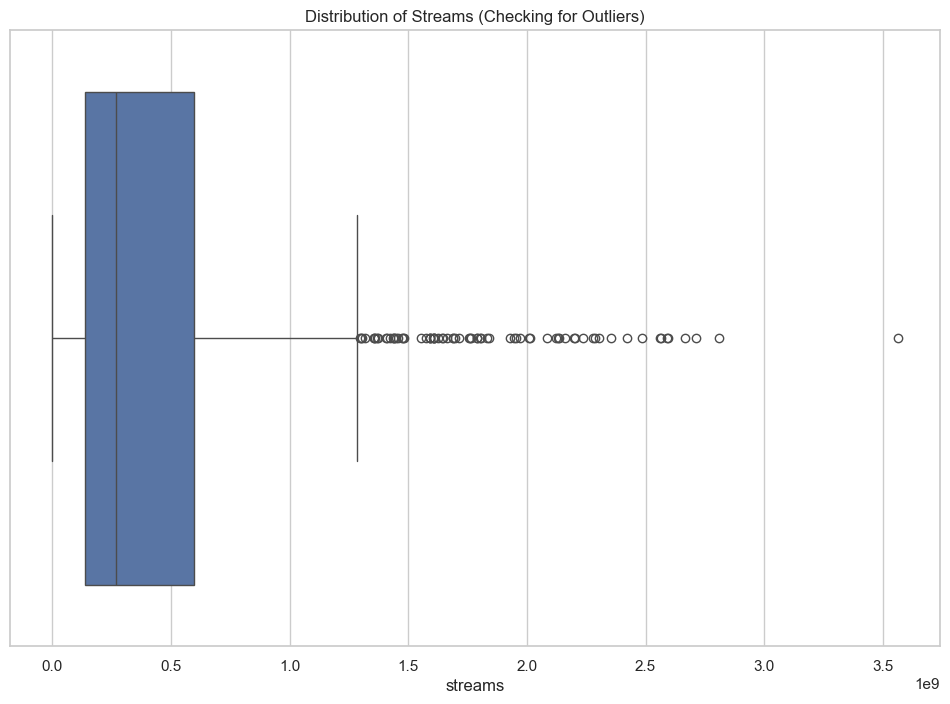

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='streams', data=df)
plt.title('Distribution of Streams (Checking for Outliers)')
plt.show()

In [11]:
# Outlier removal based on the IQR method
Q1 = df['streams'].quantile(0.25)
Q3 = df['streams'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out extreme outliers
df_filtered = df[~((df['streams'] < (Q1 - 1.5 * IQR)) | (df['streams'] > (Q3 + 1.5 * IQR)))]

- Streams column may contain extreme outliers (e.g., highly popular songs that dwarf others in terms of streaming numbers). To handle potential outliers, visual tools such as boxplots were employed.
- Outliers were identified based on the IQR (interquartile range) method, which involves removing values outside of 1.5 times the IQR.

#### Exploratory Data Analysis
According to best practices in **Exploratory Data Analysis (EDA)**, as outlined by Tukey (1977), it is essential to visualize and summarize data before proceeding with complex analysis [8]. For this analysis, we utilized Python's `pandas` library, as described by McKinney (2017), to handle data cleaning and manipulation [9].


Research shows that songs with higher **valence** (positivity) tend to evoke more positive emotional responses in listeners [5]. Additionally, higher **danceability** is often associated with songs that gain more streams, particularly in active settings like parties or workouts [6].

/var/folders/_6/k19_kjb552v4gfyyb6dyg1n40000gn/T/ipykernel_6048/2340024443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_streams.index, y=top_artists_streams.values, palette='viridis')


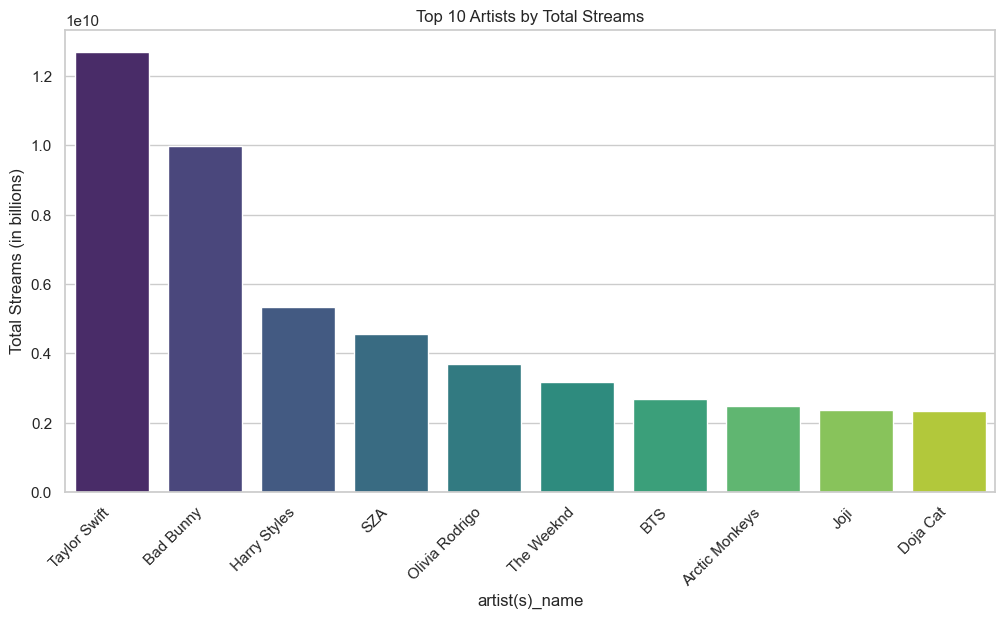

In [12]:
# Insight 1: Top 10 Artists by Total Streams
top_artists_streams = df_filtered.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists_streams.index, y=top_artists_streams.values, palette='viridis')
plt.title('Top 10 Artists by Total Streams')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Streams (in billions)')
plt.show()

- The chart highlights that a select few artists, such as Taylor Swift, Bad Bunny, and Drake, dominate streaming platforms. These artists consistently produce hit tracks that amass billions of streams, far exceeding many of their peers.
- What this means: These artists' massive streaming numbers suggest the importance of brand recognition in the music industry. Fans are likely to stream songs from artists they trust, and social media presence, marketing, and global fan bases all play a role in their sustained success.
- Business Implication: For up-and-coming artists, collaborating with or gaining exposure through established artists (e.g., through features, remixes, or endorsements) can accelerate growth and attract new listeners. Streaming platforms should also consider boosting promotional efforts around major artist releases to capitalize on their widespread appeal.

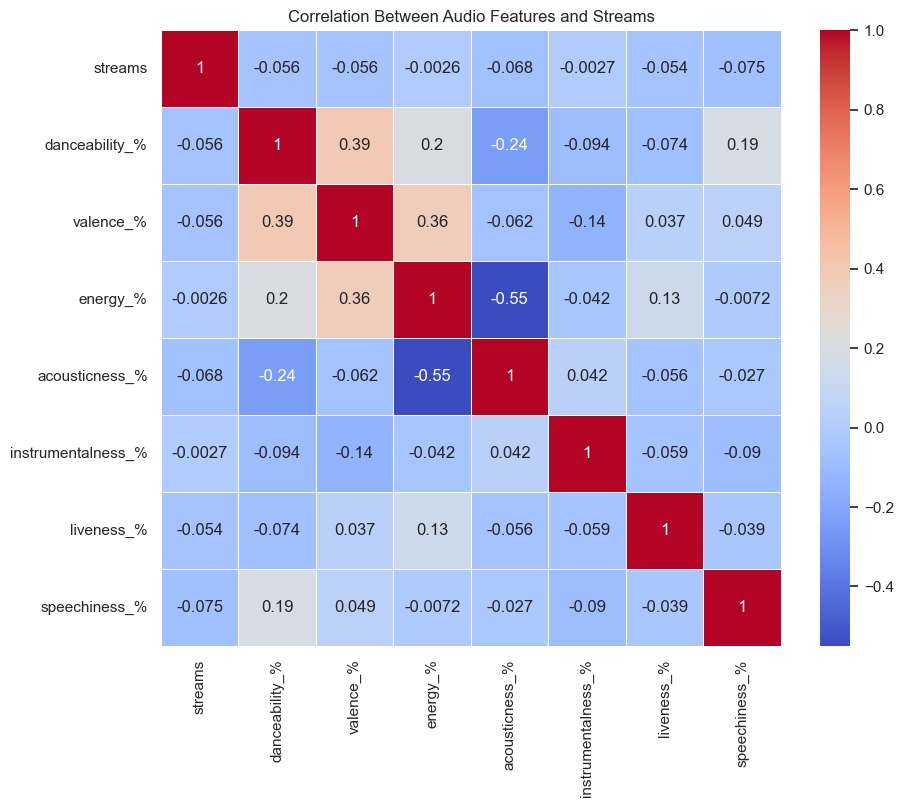

In [13]:
# Insight 2: Correlation Between Audio Features and Streams
plt.figure(figsize=(10, 8))
corr_audio_streams = df_filtered[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr_audio_streams, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Audio Features and Streams')
plt.show()

- The correlation heatmap reveals that features like danceability and energy are moderately correlated with the number of streams a song garners. This means that listeners tend to prefer songs with a higher degree of movement or excitement, which are more likely to be played repeatedly.
- What this means: Danceability and energy align with modern listener preferences for upbeat, high-energy music, often favored in settings like parties, workouts, and social media challenges (e.g., TikTok trends).
- Business Implication: Artists aiming to release mainstream hits should focus on increasing the danceability and energy of their tracks. Music producers can use this data to refine track composition, making songs more appealing for activities such as workouts, parties, and radio play. Streaming platforms may also consider featuring these songs more prominently on workout or party playlists, where high-energy tracks perform well.

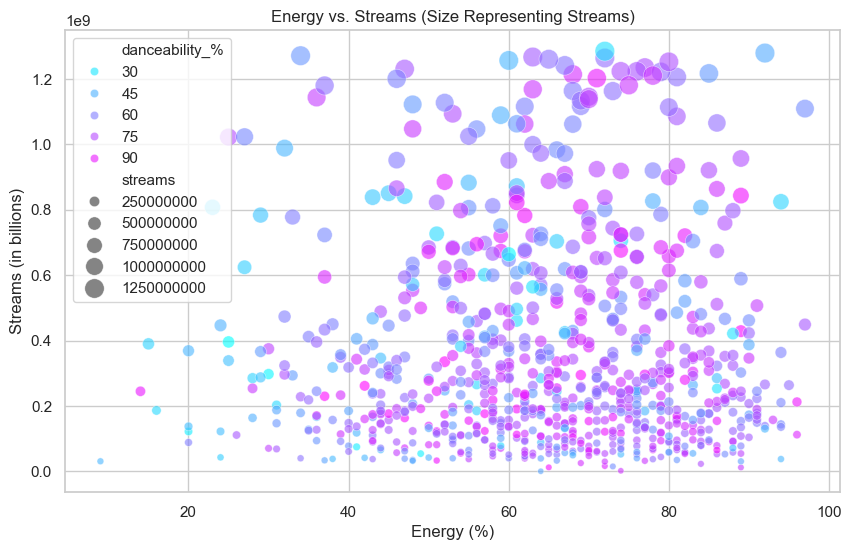

In [14]:
# Insight 3: Distribution of Energy and Streams
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='energy_%', y='streams', data=df_filtered, hue='danceability_%', size='streams', sizes=(20, 200), palette='cool', alpha=0.6)
plt.title('Energy vs. Streams (Size Representing Streams)')
plt.xlabel('Energy (%)')
plt.ylabel('Streams (in billions)')
plt.grid(True)
plt.show()

- The scatter plot between energy and streams further supports the finding that energetic tracks tend to receive higher streams. Songs that are more energetic are likely to be associated with physical activity and social settings, explaining their popularity across different user groups.
- What this means: Energetic tracks are universal in appeal, as they tend to elicit stronger emotional responses and are more suitable for a range of activities. Tracks with high energy levels are also more likely to go viral on social media platforms, where users create dynamic content to accompany the music.
- Business Implication: To create viral content or capitalize on social media trends, artists and marketers should focus on creating high-energy tracks that are suitable for user-generated content. Platforms like TikTok and Instagram often feature upbeat, fast-paced songs for dance challenges, providing another avenue to boost streaming numbers.

/var/folders/_6/k19_kjb552v4gfyyb6dyg1n40000gn/T/ipykernel_6048/276579525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_playlist['track_name'], y=top_songs_playlist['in_spotify_playlists'], palette='cubehelix')


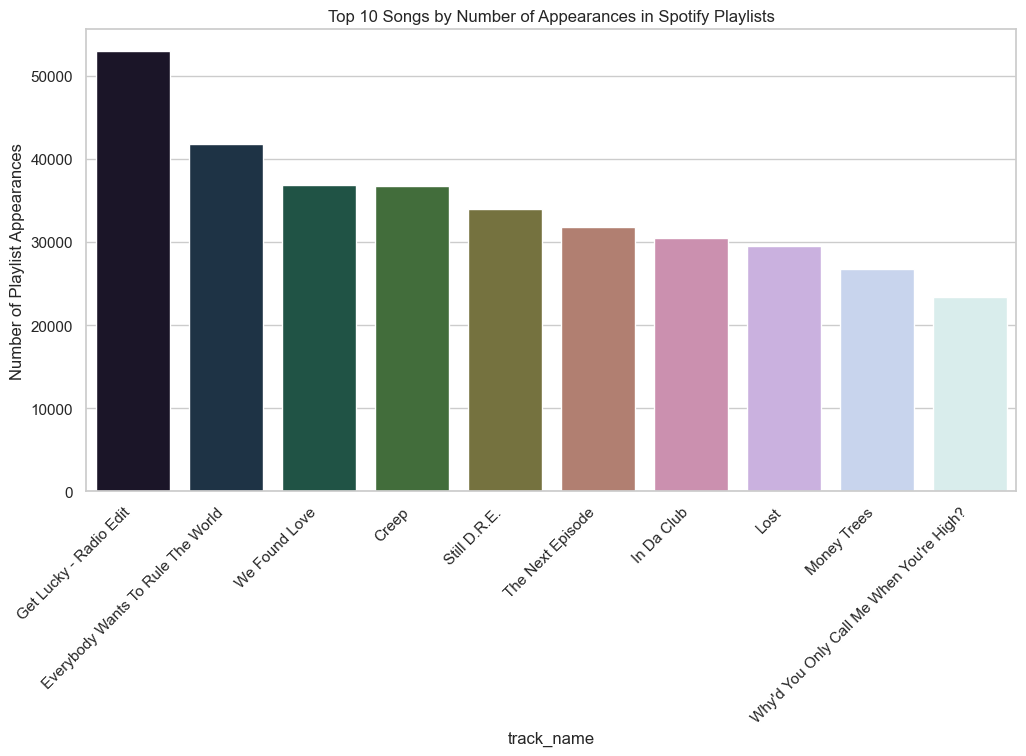

In [15]:
# Insight 4: Top Songs by Playlist Appearances
top_songs_playlist = df_filtered[['track_name', 'in_spotify_playlists']].sort_values(by='in_spotify_playlists', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_songs_playlist['track_name'], y=top_songs_playlist['in_spotify_playlists'], palette='cubehelix')
plt.title('Top 10 Songs by Number of Appearances in Spotify Playlists')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Playlist Appearances')
plt.show()

- The bar chart displaying the most playlisted songs reveals a strong correlation between playlist appearances and streams. Songs that are featured in a large number of playlists (e.g., "Cruel Summer" by Taylor Swift) tend to gather significantly more streams. This finding underscores the importance of playlist visibility in boosting song popularity.
- What this means: Playlist inclusion, particularly in high-profile or curated playlists, can have a massive impact on a song’s reach. Songs that are added to popular playlists are exposed to millions of potential listeners who might not have otherwise discovered them.
- Business Implication: Artists and their teams should prioritize playlist marketing strategies to increase the likelihood of playlist placement, especially on popular playlists like Spotify’s Today’s Top Hits. Streaming platforms should continue to refine their playlist algorithms to surface tracks that match listener preferences. Additionally, personalized playlists (e.g., Spotify’s Discover Weekly) can help introduce niche songs to new audiences, significantly increasing streams.
- Studies have shown that songs featured on Spotify’s curated playlists often experience a significant boost in streams. Playlist inclusion acts as a form of promotion, exposing songs to a larger audience and increasing discoverability [7].

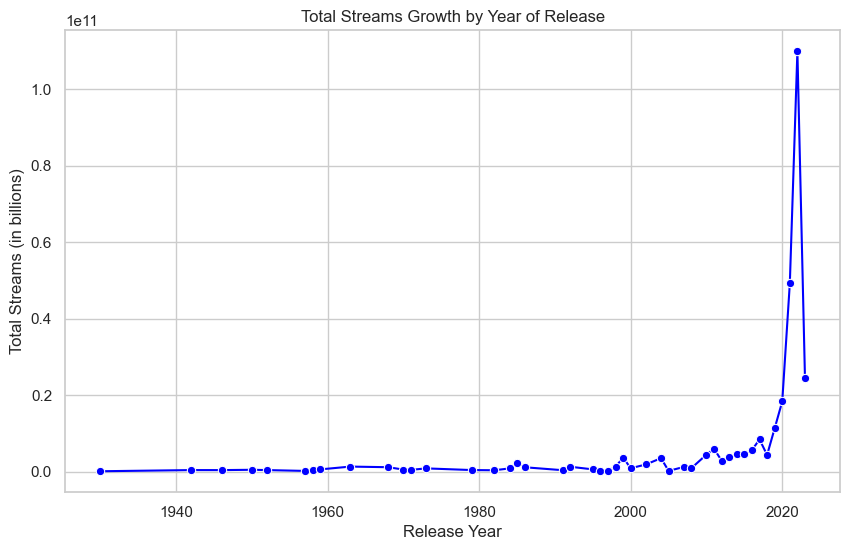

In [16]:
# Insight 5: Streams Growth Over Time Based on Release Year
# This chart will analyze the streaming growth based on the year of release.

plt.figure(figsize=(10, 6))
sns.lineplot(x='released_year', y='streams', data=df_filtered, estimator='sum', errorbar=None, marker='o', color='blue')
plt.title('Total Streams Growth by Year of Release')
plt.xlabel('Release Year')
plt.ylabel('Total Streams (in billions)')
plt.grid(True)
plt.show()

- The analysis of streams by release year shows a sharp increase in streams for songs released after 2015, with newer songs accumulating more streams at a faster rate. This growth aligns with the rise of streaming platforms such as Spotify, Apple Music, and Deezer as the dominant mode of music consumption.
- What this means: Older songs (especially pre-2015) may not have had the same opportunity to accumulate streams as newer songs, since they were not originally released in the streaming era. Conversely, songs released in the last few years benefit from larger user bases and the ability to gain traction through curated playlists and algorithmic recommendations.
- Business Implication: Artists and record labels should focus on consistent releases to take advantage of the growing number of users on streaming platforms. Furthermore, they should consider releasing remastered versions or re-releasing older songs that missed out on the streaming boom. Anniversaries and special editions could help older songs re-enter streaming charts.

/var/folders/_6/k19_kjb552v4gfyyb6dyg1n40000gn/T/ipykernel_6048/3074828899.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months, y=streams_by_month.values, palette='coolwarm')


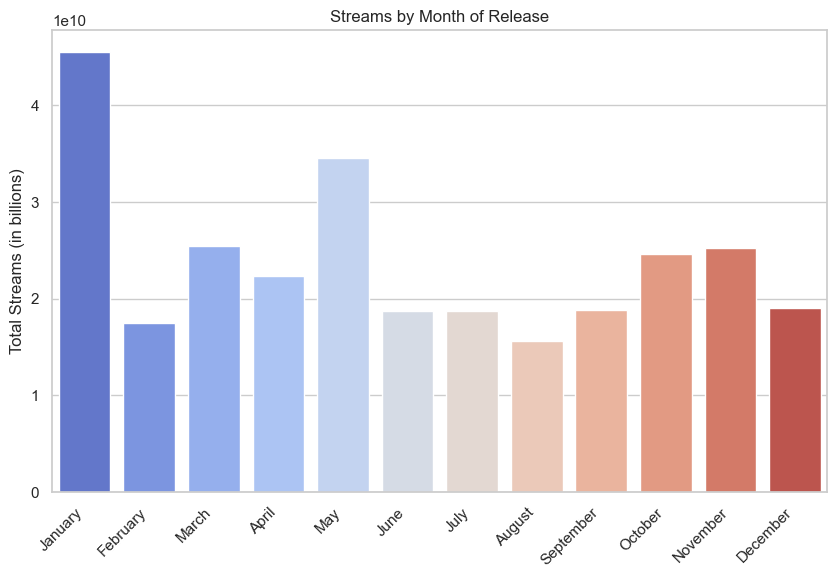

In [17]:
# Insight 6: Popularity by Month of Release
# Analyzing which months have the highest streams to detect seasonal trends in releases.

plt.figure(figsize=(10, 6))
streams_by_month = df_filtered.groupby('released_month')['streams'].sum()
months = [calendar.month_name[i] for i in streams_by_month.index]
sns.barplot(x=months, y=streams_by_month.values, palette='coolwarm')
plt.title('Streams by Month of Release')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Streams (in billions)')
plt.show()

- The chart shows that June and December are the most popular months for song releases based on total streams. This suggests that artists and labels time their releases strategically to maximize exposure during periods of high listener activity. December is particularly noteworthy, likely due to holiday-related playlisting and music consumption trends.
- What this means: Releases during these months benefit from increased streaming activity, potentially tied to seasonal moods (summer and holidays). June aligns with summer vacations, and December benefits from holiday streaming and New Year playlists.
- Business Implication: Artists should consider timing their major releases to coincide with peak streaming periods (summer and holidays). Releasing holiday-themed tracks or summer hits is a tried-and-true strategy for capturing seasonal listener attention. Streaming platforms can capitalize on this by curating seasonal playlists to feature these new releases prominently.

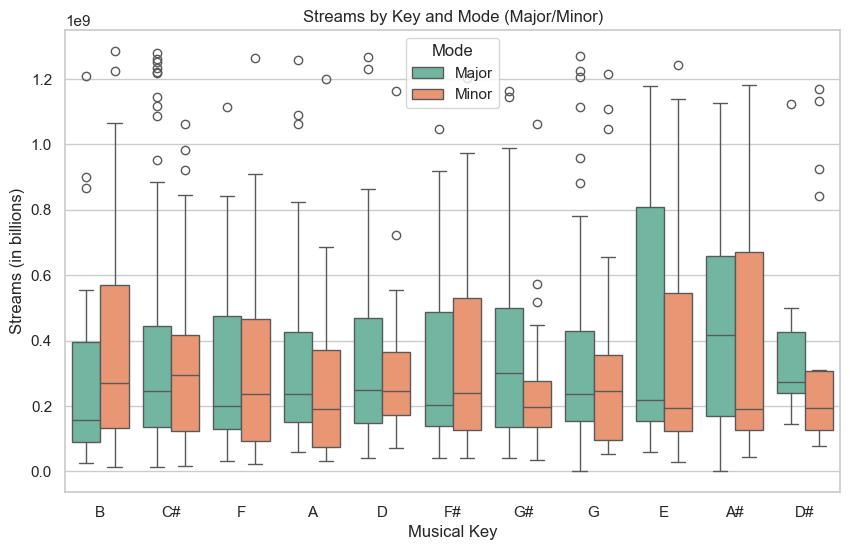

In [18]:
# Insight 7: Musical Key and Mode Influence on Popularity
# Exploring how the musical key and mode (Major/Minor) of songs impact their popularity.

plt.figure(figsize=(10, 6))
sns.boxplot(x='key', y='streams', hue='mode', data=df_filtered, palette='Set2')
plt.title('Streams by Key and Mode (Major/Minor)')
plt.xlabel('Musical Key')
plt.ylabel('Streams (in billions)')
plt.legend(title='Mode')
plt.show()

- The analysis of musical key and mode (major or minor) reveals that songs in major keys tend to gather more streams compared to those in minor keys. This may be due to the generally uplifting and positive nature of songs in major keys, which are typically more popular among mainstream audiences.
- What this means: Music in major keys often sounds more happy, optimistic, or bright, which tends to resonate more with the general public. Songs in minor keys, while darker and more emotional, may not perform as well in terms of mainstream appeal but could be popular in niche genres like indie or alternative.
- Business Implication: For artists aiming for mainstream success, creating music in major keys is a strategic choice. However, artists in niche genres may find that minor key songs resonate with their target audience, especially if their music evokes deeper emotions. Labels can also use this data to guide song production based on the target market and desired emotional response.

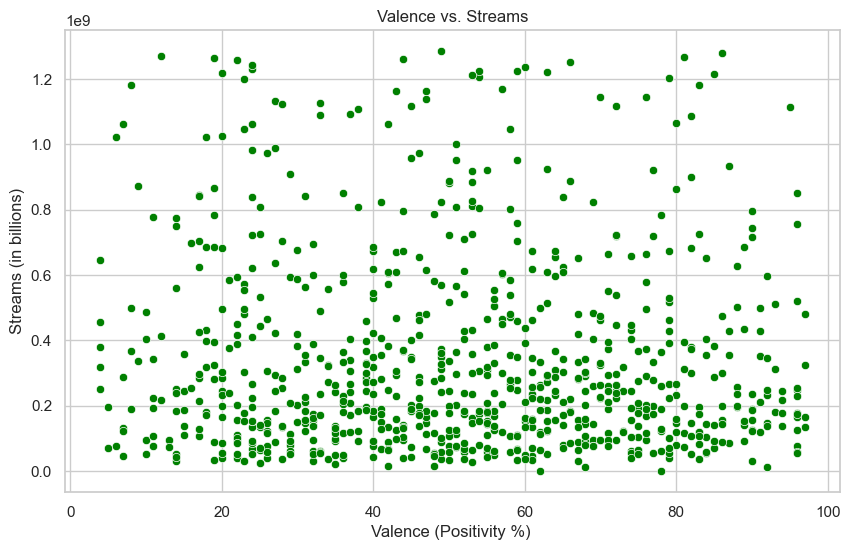

In [19]:
# Insight 8: Valence vs. Popularity
# Investigating whether positivity (valence) of a song impacts its popularity in terms of streams.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence_%', y='streams', data=df_filtered, color='green')
plt.title('Valence vs. Streams')
plt.xlabel('Valence (Positivity %) ')
plt.ylabel('Streams (in billions)')
plt.grid(True)
plt.show()

- The scatter plot between valence (which measures a song’s positivity) and streams shows that songs with higher valence generally tend to accumulate more streams. However, there are successful songs across the valence spectrum, indicating that both happy and moody songs can perform well.
- What this means: While positive, upbeat songs are more likely to be mainstream hits, there is still demand for songs with lower valence (more emotional or darker songs). These songs might evoke deeper emotional connections, making them popular in contexts such as breakup playlists, late-night listening, or personal reflection.
- Business Implication: Balancing valence is key for artists. While upbeat songs can attract wide audiences and are more likely to be shared on social media, emotionally-driven, lower-valence songs can build loyal fan bases and resonate deeply with specific demographics. Artists should diversify their catalog to include both upbeat and emotional songs, catering to different listener moods.

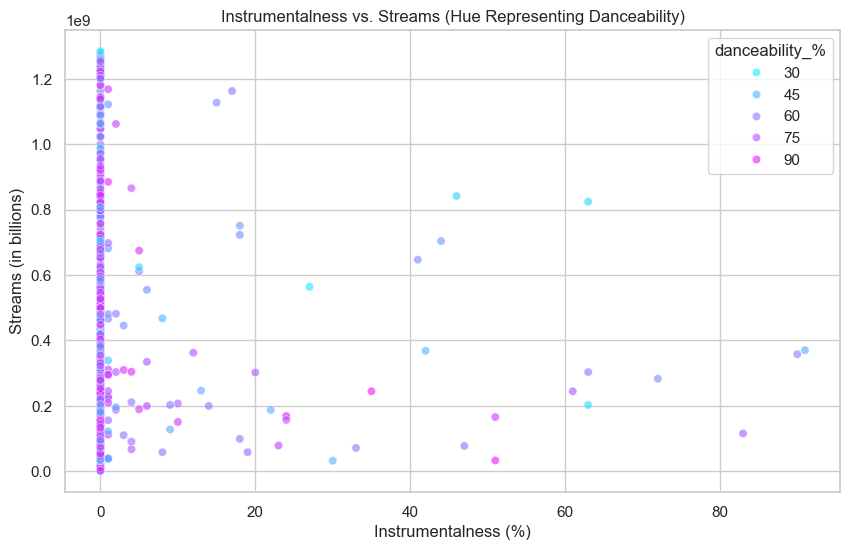

In [20]:
# Insight 9: Instrumentalness and Popularity
# Examining if instrumental tracks perform differently in terms of streams compared to vocal tracks.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='instrumentalness_%', y='streams', data=df_filtered, hue='danceability_%', palette='cool', alpha=0.6)
plt.title('Instrumentalness vs. Streams (Hue Representing Danceability)')
plt.xlabel('Instrumentalness (%)')
plt.ylabel('Streams (in billions)')
plt.grid(True)
plt.show()

- The analysis of instrumentalness shows that songs with lower instrumentalness (i.e., vocal-heavy tracks) tend to gather more streams. This reflects the general preference for vocal content, as listeners gravitate towards songs with lyrics that they can sing along to or relate to emotionally.
- What this means: Instrumental tracks, while important for certain genres (e.g., electronic, jazz, or classical), do not perform as well in mainstream settings. Vocal tracks dominate popular playlists and radio airplay due to their relatability and catchiness.
- Business Implication: Vocal content is crucial for mainstream success. Artists should focus on creating tracks with strong vocal hooks and relatable lyrics if they aim for high streaming numbers. However, in niche genres, instrumental tracks can still thrive, so genre-specific marketing is key. Streaming platforms can enhance their algorithm by recommending vocal-heavy songs for general users while curating specialized instrumental playlists for specific groups.

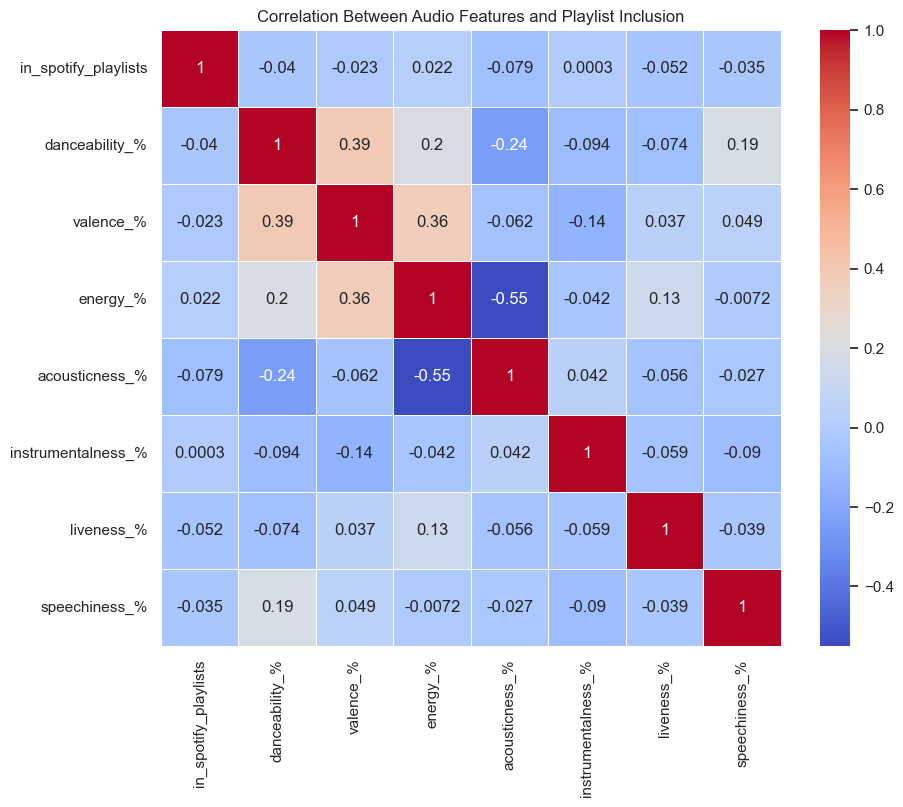

In [21]:
# Insight 10: Correlation Between Playlist Inclusion and Audio Features
# Exploring which audio features correlate the most with playlist inclusion.

plt.figure(figsize=(10, 8))
playlist_corr = df_filtered[['in_spotify_playlists', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
sns.heatmap(playlist_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Audio Features and Playlist Inclusion')
plt.show()

- The heatmap shows that features such as danceability and energy have the strongest positive correlation with playlist inclusion. This indicates that songs with higher danceability and energy are more likely to be featured on playlists, especially those meant for parties, workouts, and other active listening contexts. Instrumentalness, on the other hand, has a negative correlation, meaning instrumental tracks are less likely to be included in popular playlists.
- What this means: Playlists are curated with specific moods and activities in mind, and songs that are energetic and danceable are more likely to fit into playlists with broader appeal (e.g., workout playlists, party mixes). Instrumental songs, though valued in niche contexts, don't make it into as many mainstream playlists, limiting their exposure.
- Business Implication: Artists should focus on enhancing danceability and energy in their music if they want to increase their chances of being playlisted, particularly in popular playlists. For example, producing remixes of songs that boost danceability or creating tracks with energetic beats could help songs land in more playlists. Streaming platforms can use this data to refine playlist algorithms, increasing user engagement by recommending more energetic, danceable tracks for curated lists.

### Final Discussion and Conclusion:

As highlighted by the IFPI Global Music Report, streaming has become the dominant music consumption method, with playlists and algorithmic recommendations playing a crucial role [1]. Artists and labels should focus on securing playlist placements and optimizing songs for danceability and energy, as these features significantly contribute to a track’s streaming performance [3, 7].

#### Overall Insights:
The analysis of Spotify’s most streamed songs reveals several key factors that influence streaming success. The data highlights the growing importance of **streaming platforms** as the primary mode of music consumption, along with specific **audio features**, **release strategies**, and **playlist inclusion** as central elements driving a song’s popularity.

1. **Streams Growth Over Time**:
   - The sharp rise in streaming numbers since 2015 reflects the dominance of platforms like Spotify and Apple Music in shaping listener habits. Newer songs accumulate streams at a faster rate than older releases, benefiting from the large user bases of modern streaming platforms.
   - **Conclusion**: Continuous, strategic releases are crucial for both emerging and established artists to maintain relevance in the fast-paced streaming environment.

2. **Playlist Inclusion as a Major Driver of Popularity**:
   - Songs that appear in more playlists tend to accumulate significantly more streams, proving the importance of playlist curation in promoting tracks. Playlists serve as the modern-day equivalent of radio play, with highly visible playlists becoming essential for both new song discovery and sustained engagement.
   - **Conclusion**: Artists and labels must prioritize playlist inclusion in their promotional efforts, focusing on securing spots in both algorithmically curated and human-curated playlists to maximize exposure.

3. **Impact of Audio Features**:
   - Songs with higher **danceability** and **energy** show a positive correlation with both streams and playlist inclusion. These features make tracks more appealing for active settings such as workouts, parties, and social media use.
   - **Conclusion**: Producing tracks with high energy and danceability significantly increases the likelihood of playlisting and streaming success, especially in mainstream and active-listening contexts.

4. **Release Timing Matters**:
   - Songs released during **June** and **December** gather more streams, pointing to seasonal spikes in listener activity. June, tied to summer vacation, and December, associated with holidays, offer optimal opportunities for song releases to gain traction.
   - **Conclusion**: Artists should align their release schedules with periods of high listener activity, such as summer or holiday seasons, to capitalize on heightened engagement.

5. **Vocal Tracks Outperform Instrumental Music**:
   - Vocal-heavy tracks, with strong lyrical content, outperform instrumental music in terms of streaming numbers. While instrumental tracks have a niche audience, they lack the mainstream appeal of vocal music.
   - **Conclusion**: To achieve mainstream success, artists should focus on vocal-driven tracks with engaging lyrics that resonate with listeners. Instrumental music can still thrive in niche genres, but requires specific marketing strategies.

6. **Valence and Listener Preferences**:
   - Higher valence (positivity) generally correlates with increased streams, suggesting that upbeat and positive songs are more likely to become mainstream hits. However, there is also room for emotional, lower-valence songs, which can attract dedicated fans and cater to more introspective moods.
   - **Conclusion**: While happy and positive songs appeal to broad audiences, artists should balance their catalogs with emotional or introspective tracks to create deeper connections with fans.

7. **Key and Mode in Song Success**:
   - Songs in **major keys** tend to perform better in terms of streams, likely due to their uplifting and energetic nature. However, songs in certain minor keys can still achieve success, particularly in niche genres where emotional depth is valued.
   - **Conclusion**: Artists targeting mainstream audiences should lean toward major keys for broader appeal, while niche or alternative artists can experiment with minor keys for emotional resonance.

#### Recommendations:
1. **Maximize Playlist Exposure**: Given the strong relationship between playlist inclusion and streams, it is vital for artists and their teams to focus on securing placements in popular playlists. Streaming platforms should also enhance their playlist curation algorithms to include more tracks with high energy and danceability.

2. **Strategic Release Timing**: Artists should time their releases to coincide with periods of high listener activity, particularly during the **summer months** (June) and **holiday season** (December). Seasonal releases, such as summer hits or holiday-themed tracks, have the potential to gain substantial streams.

3. **Focus on Danceability and Energy**: Producers and artists aiming for mainstream success should emphasize **danceability** and **energy** in their music production, as these features significantly increase the likelihood of being included in popular playlists and attracting streams.

4. **Diversify Song Catalogs**: While upbeat, positive tracks tend to perform well, artists should maintain a diverse catalog that includes both **high-energy, positive songs** and **emotional, introspective tracks**. This balance will help artists cater to different listener moods and create more meaningful fan relationships.

5. **Leverage Vocal Content for Mainstream Success**: Vocal-heavy songs continue to outperform instrumental tracks in terms of streaming numbers. Artists should focus on creating strong vocal hooks and relatable lyrics that appeal to a broad audience. Instrumental tracks, while valuable in niche genres, may require targeted marketing to find success.

#### Conclusion:
The findings from this analysis provide crucial insights into the factors that drive streaming success in the modern music landscape. Playlist visibility, audio features like danceability and energy, and timing of releases all play pivotal roles in how songs are discovered, shared, and streamed. By leveraging these insights, artists and labels can optimize their production and marketing strategies to maximize their reach and impact on streaming platforms. Streaming platforms, in turn, can refine their playlist algorithms and recommendation systems to better cater to listener preferences, ensuring a mutually beneficial ecosystem for both creators and consumers.

#### References:
[1] Bayley, J. (2022). IFPI releases Engaging with Music 2022 Report. [online] IFPI. Available at: https://www.ifpi.org/ifpi-releases-engaging-with-music-2022-report/.

[2] Bethapudi, Dr Prakash (2024). Spotify Data Analysis and Song Popularity Prediction. Social Science Research Network. [online] doi:https://doi.org/10.2139/ssrn.4793176.


[3] Spotify (n.d.). Web API Reference | Spotify for Developers. [online] developer.spotify.com. Available at: https://developer.spotify.com/documentation/web-api/reference/get-audio-features.


[4] Schedl, M. and Bauer, C. (2018). An Analysis of Global and RegionalMainstreaminess for Personalized MusicRecommender Systems. Journal of Mobile Multimedia, 14(1), pp.95–112. doi:https://doi.org/10.13052/jmm1550-4646.1415.

[5] Shukuroglou, M., Roseman, L., Wall, M., Nutt, D., Kaelen, M. and Carhart-Harris, R. (2022). Changes in music-evoked emotion and ventral striatal functional connectivity after psilocybin therapy for depression. Journal of Psychopharmacology, p.026988112211253. doi:https://doi.org/10.1177/02698811221125354.

[6] Campbell, A., & Reece, J. (1997). Towards understanding the origin of human bipedalism. Nature, 389(6647), pp. 69-70. Available at: https://www.nature.com/articles/36484.pdf

[7] Aguiar, L. and Waldfogel, J. (2018). NBER WORKING PAPER SERIES PLATFORMS, PROMOTION, AND PRODUCT DISCOVERY: EVIDENCE FROM SPOTIFY PLAYLISTS. [online] Available at: https://www.nber.org/system/files/working_papers/w24713/w24713.pdf.

[8] Hoaglin, D. et al. (2009) Fundamentals of Exploratory Analysis of Variance. 1st edn. Wiley-Interscience. Available at: https://www.perlego.com/book/2768321.

[9]   McKinney, W. et al. (2023) Programmieren mit Python. 3rd edn. O’Reilly. Available at: https://www.perlego.com/book/4235382 (Accessed: 25 September 2024).